In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import scipy.optimize as o

# Problem 4.5

In [2]:
def g(w):
    return np.log(1 + np.exp(np.sum(w**2.0)))

def grad(w):
    return 2 * np.exp(np.sum(w**2.0)) / (np.exp(np.sum(w**2.0)) + 1) * w

def hessian(w):
    d2w1 = (2 * w[0]**2.0 + 1 + np.exp(np.sum(w**2.0))) / (2.0 * (np.cosh(np.sum(w**2.0) / 2))**2.0)
    d2w2 = (2 * w[1]**2.0 + 1 + np.exp(np.sum(w**2.0))) / (2.0 * (np.cosh(np.sum(w**2.0) / 2))**2.0)
    d2w1w2 = (w[0] * w[1]) / (np.cosh(np.sum(w**2.0) / 2))**2.0
    
    hess = np.zeros((2, 2))
    hess[0, 0], hess[1, 1] = d2w1, d2w2
    hess[0, 1], hess[1, 0] = d2w1w2, d2w1w2
    
    return hess

def newton(w, steps):
    cost = []
    
    for i in range(steps):
        cost.append(g(w))

        step = np.matmul(np.linalg.inv(hessian(w)), grad(w))
        
        w = w - step
    
    return cost

Text(0, 0.5, '$g(\\mathbf{w})$')

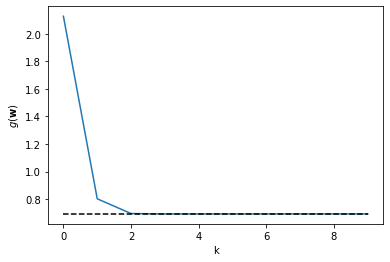

In [3]:
#Part C
w0 = np.ones((2, 1))
cost = newton(w0, 10)

plt.plot(cost)
plt.plot(range(10), np.log(2)*np.ones((10)), 'k--')
plt.xlabel("k")
plt.ylabel("$g(\\mathbf{w})$")

Text(0, 0.5, '$g(\\mathbf{w})$')

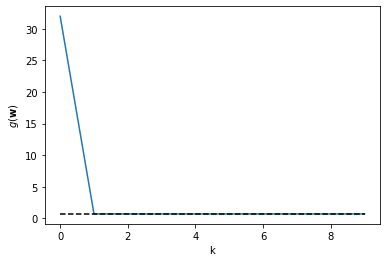

In [4]:
#Part D
w0 = 4*np.ones((2, 1))
cost = newton(w0, 10)

plt.plot(cost)
plt.plot(range(10), np.log(2)*np.ones((10)), 'k--')
plt.xlabel("k")
plt.ylabel("$g(\\mathbf{w})$")

# Problem 5.2

In [5]:
kleiber = np.genfromtxt("kleiber.csv", delimiter=',')

#Fix first mass for some reason
kleiber[0, 0] = 1370

In [6]:
#Part A
w1, w0, _, _, _ = s.linregress(np.log(kleiber[0, :]), np.log(kleiber[1, :]))
print("w0 = %0.2f, w1 = %0.2f" % (w0, w1))

w0 = 6.81, w1 = 0.65


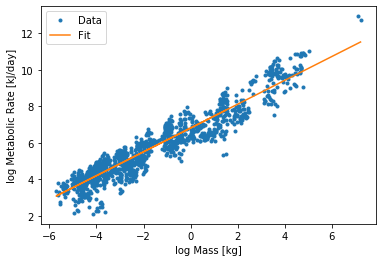

In [7]:
plt.plot(np.log(kleiber[0, :]), np.log(kleiber[1, :]), '.', label="Data")
plt.plot(np.log(kleiber[0, :]), w1 * np.log(kleiber[0, :]) + w0, label="Fit")
plt.xlabel("log Mass [kg]")
plt.ylabel("log Metabolic Rate [kJ/day]")
plt.legend()

# Problem 5.9

In [8]:
def RMSE(w, x, y):
    cost = 0
    for p in range(y.size):
        x_p = x[:, p]
        y_p = y[p]
        
        a = w[0] + np.dot(x_p.T, w[1:])
        cost += (a.T - y_p)**2.0
        
    return np.sqrt(cost / float(y.size))

def MAD(w, x, y):
    cost = 0
    for p in range(y.size):
        x_p = x[:, p][:, np.newaxis]
        y_p = y[p]
        
        a = w[0] + np.dot(x_p.T, w[1:])
        cost += np.abs(a.T - y_p)
        
    return cost / float(y.size)


In [9]:
#Boston Data: Ex. 5.5
boston = np.genfromtxt("boston_housing.csv", delimiter=',')
x, y = boston[:-1, :], boston[-1:, :].flatten()

print("Input x shape: ", x.shape)
print("Input y shape: ", y.shape)

#Calculating means and standard deviations in rows
means = np.nanmean(x, axis=1)
stds  = np.nanstd(x, axis=1)

#Now normalize the data
transformed = np.zeros(x.shape)

for i in range(means.size):
    transformed[i, :] = (x[i, :] - means[i]) / stds[i]

#Run the conjugate gradient method, find minimum weights and print out cost
print("RMSE: %0.1f" % o.minimize(RMSE, np.ones(14), args=(transformed, y), method='CG')['fun'])
print("MAD: %0.1f" %  o.minimize(MAD,  np.ones(14), args=(transformed, y), method='CG')['fun'])

Input x shape:  (13, 506)
Input y shape:  (506,)
RMSE: 4.7
MAD: 3.1


In [10]:
#Automobile Data: Ex 5.6
auto = np.genfromtxt("auto_data.csv", delimiter=',')
x, y = auto[:-1, :], auto[-1:, :]

print("Input x shape: ", x.shape)
print("Input y shape: ", y.shape)

#Calculating means and standard deviations in rows
means = np.nanmean(x, axis=1)
stds  = np.nanstd(x, axis=1)

#Now normalize the data
transformed = np.zeros(x.shape)

for i in range(means.size):
    transformed[i, :] = (x[i, :] - means[i]) / stds[i]

#Remove the 6 NaN values in the x-data
indices = np.any(np.isnan(transformed), axis=0)
transformed = transformed[:, ~indices]
y = y.flatten()[~indices]

#Run the conjugate gradient method, find minimum weights and print out cost
print("RMSE: %0.1f" % o.minimize(RMSE, np.ones(8), args=(transformed, y), method='CG')['fun'])
print("MAD: %0.1f"  % o.minimize(MAD,  np.ones(8), args=(transformed, y), method='CG')['fun'])

Input x shape:  (7, 399)
Input y shape:  (1, 399)
RMSE: 3.3
MAD: 2.4
